# TD n°8 : Comment détecter les contours dans une image numérique ?
La détection de contours  a pour objectif de repérer les points d'une image numérique qui correspondent à un changement brutal d'intensité lumineuse. Elle réduit de manière significative a quantité de données et élimine les informations qu'on peut juger moins pertinentes, tout en préservant les propriétés structurelles importantes de l'image. D'une façon simplifiée, on traite séparément les contours "horizontaux" et les contours "verticaux", et on constitue une image globale des constours. Voici un schéma des différentes étapes à suivre pour détecter les contours d'une image :
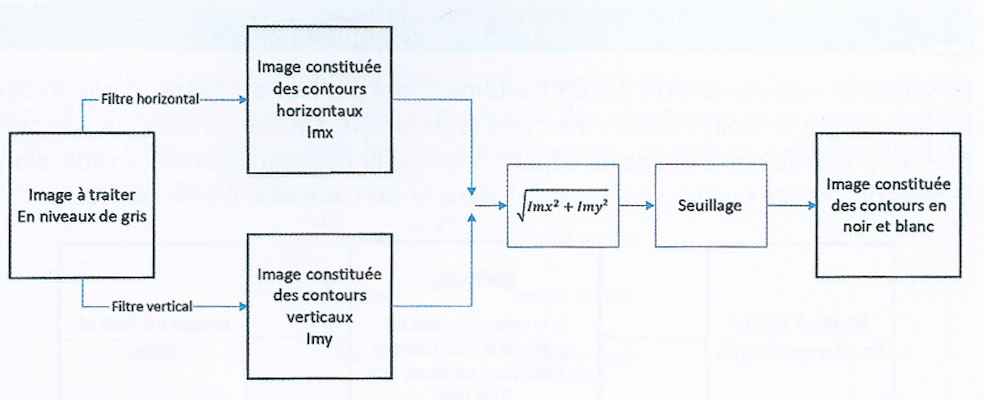
Pour obtenir chaque image intermédiaire, on affecte à la valeur du nouveau pixel la moyenne pondérée des coefficients affectés aux pixels de l'image à traiter et à ses voisins. Par exemple, dans le cas du filtre de Prewitt, nous avons les coefficients suivants à affecter pour les contours horizontaux :
<table style="width:10%;">
    <tbody>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
    </tbody>
</table>
et verticaux :
<table style="width:10%;">
    <tbody>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
    </tbody>
</table>
On notera que les pixels  du bord ne sont pas traités et seront donc noirs par défaut.

## 1) Mise de l'image en niveaux de gris
Tout d'abord, il faut transformer l'image en couleurs RGB en une image en niveaux de gris. On utilise l'algorithme qu'on a déjà utilisé dans le TD5 précédent.
Lire et exécuter le code ci-dessous :

In [ ]:
# -*- coding: utf-8 -*-

import PIL.Image as pil
import matplotlib.pyplot as plt
import math

# ouverture du fichier image avec la librairie pillow
img_in = pil.open("butterfly.jpg")

# affichage de l'image initiale
plt.imshow(img_in)
plt.title("butterfly.jpg")
plt.show()

# Taille de l'image : L et H sont la largeur et la hauteur de l'image en pixels
L,H = img_in.size
print("definition de l'image : ", L, H)

# 1) création de l'image en niveaux de gris
img_out_gris = pil.new("RGB", [L,H])
for i in range(L):
    for j in range(H):
        # récupération du pixel situé à la ligne i et à la colonne j
        r,g,b = img_in.getpixel((i,j))
        # calcul de l'image en niveaux de gris
        moy = (r+g+b)//3
        #print(moy)
        # dans la nouvelle image, on ne met que la composante rouge du pixel
        img_out_gris.putpixel((i,j), (moy,moy,moy))
# sauvegarde de l'image crée dans le fichier butterfly_rouge.jpg
img_out_gris.save("butterfly_gris.jpg")

# affichage de l'image initiale
plt.imshow(img_out_gris)
plt.title("butterfly_gris.jpg")
plt.show()

## 2) Détection des contours horizontaux
Pour chaque pixel de l'image, on utilise le filtre suivant pour calculer la nouvelle valeur du pixel :
<table style="width:10%;">
    <tbody>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
    </tbody>
</table>
Les calculs sont faits à partir de l'image en niveaux de gris.
Lire et éxécuter le code suivant :

In [ ]:
img_out_contours_horizontal = pil.new("RGB", [L,H])
for i in range(1,L-1):
    for j in range(1,H-1):
        # récupération des 9 pixels situés autour de la ligne i et à la colonne j
        r1,g1,b1 = img_out_gris.getpixel((i-1,j-1))
        r2,g2,b2 = img_out_gris.getpixel((i,j-1))
        r3,g3,b3 = img_out_gris.getpixel((i+1,j-1))
        r4,g4,b4 = img_out_gris.getpixel((i-1,j))
        r5,g5,b5 = img_out_gris.getpixel((i,j))
        r6,g6,b6 = img_out_gris.getpixel((i+1,j))
        r7,g7,b7 = img_out_gris.getpixel((i-1,j+1))
        r8,g8,b8 = img_out_gris.getpixel((i,j+1))
        r9,g9,b9 = img_out_gris.getpixel((i+1,j+1))

        # Filtre horizontal appliqué à chaque pixel pour détecter les contours horizontaux
        moy_horizontal = (r7+r8+r9-r1-r2-r3)//9
        if moy_horizontal < 10 :
            moy_horizontal = 0
        else :
            moy_horizontal = 255
        img_out_contours_horizontal.putpixel((i,j), (moy_horizontal,moy_horizontal,moy_horizontal))
        
# sauvegarde des images créées
img_out_contours_horizontal.save("butterfly_contours_horizontal.jpg")


# affichage des contours
plt.imshow(img_out_contours_horizontal)
plt.title("butterfly_contours_horizontal.jpg")
plt.show()

## 3) Détection des contours verticaux
Pour chaque pixel de l'image, on utilise le filtre suivant pour calculer la nouvelle valeur du pixel :
<table style="width:10%;">
    <tbody>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
        <tr>
            <td style="text-align:center;border:solid;border-width:1px;">-1</td>
            <td style="text-align:center;border:solid;border-width:1px;">0</td>
            <td style="text-align:center;border:solid;border-width:1px;">+1</td>
        </tr>
    </tbody>
</table>
Modifier et éxécuter le code suivant pour détecter les contours verticaux (attention, il faut changer aussi le nom des fichiers) :

In [ ]:
img_out_contours_horizontal = pil.new("RGB", [L,H])
for i in range(1,L-1):
    for j in range(1,H-1):
        # récupération des 9 pixels situés autour de la ligne i et à la colonne j
        r1,g1,b1 = img_out_gris.getpixel((i-1,j-1))
        r2,g2,b2 = img_out_gris.getpixel((i,j-1))
        r3,g3,b3 = img_out_gris.getpixel((i+1,j-1))
        r4,g4,b4 = img_out_gris.getpixel((i-1,j))
        r5,g5,b5 = img_out_gris.getpixel((i,j))
        r6,g6,b6 = img_out_gris.getpixel((i+1,j))
        r7,g7,b7 = img_out_gris.getpixel((i-1,j+1))
        r8,g8,b8 = img_out_gris.getpixel((i,j+1))
        r9,g9,b9 = img_out_gris.getpixel((i+1,j+1))

        # Filtre horizontal appliqué à chaque pixel pour détecter les contours horizontaux
        moy_horizontal = (r7+r8+r9-r1-r2-r3)//9
        if moy_horizontal < 10 :
            moy_horizontal = 0
        else :
            moy_horizontal = 255
        img_out_contours_horizontal.putpixel((i,j), (moy_horizontal,moy_horizontal,moy_horizontal))
        
# sauvegarde des images créées
img_out_contours_horizontal.save("butterfly_contours_horizontal.jpg")


# affichage des contours
plt.imshow(img_out_contours_horizontal)
plt.title("butterfly_contours_horizontal.jpg")
plt.show()

## 4) calcul de la moyenne des contours et seuillage
- La fonction math.sqrt() permet de calculer la racine carrée d'un nombre
- Pour mettre un nombre au carré, on utilise une double étoile
Lire et exécuter le code suivant (attention aux noms des fichiers) :

In [ ]:
img_out_contours_horizontal = pil.new("RGB", [L,H])
img_out_contours_vertical = pil.new("RGB", [L,H])
img_out_contours = pil.new("RGB", [L,H])
for i in range(1,L-1):
    for j in range(1,H-1):
        # récupération des 9 pixels situés autour de la ligne i et à la colonne j
        r1,g1,b1 = img_out_gris.getpixel((i-1,j-1))
        r2,g2,b2 = img_out_gris.getpixel((i,j-1))
        r3,g3,b3 = img_out_gris.getpixel((i+1,j-1))
        r4,g4,b4 = img_out_gris.getpixel((i-1,j))
        r5,g5,b5 = img_out_gris.getpixel((i,j))
        r6,g6,b6 = img_out_gris.getpixel((i+1,j))
        r7,g7,b7 = img_out_gris.getpixel((i-1,j+1))
        r8,g8,b8 = img_out_gris.getpixel((i,j+1))
        r9,g9,b9 = img_out_gris.getpixel((i+1,j+1))

        # Filtre horizontal appliqué à chaque pixel pour détecter les contours horizontaux
        moy_horizontal = (r7+r8+r9-r1-r2-r3)//9
        if moy_horizontal < 10 :
            moy_horizontal = 0
        else :
            moy_horizontal = 255
        img_out_contours_horizontal.putpixel((i,j), (moy_horizontal,moy_horizontal,moy_horizontal))

        # Filtre horizontal appliqué à chaque pixel pour détecter les contours verticaux
        moy_vertical = (r3+r6+r9-r1-r4-r7)//9
        if moy_vertical < 10 :
            moy_vertical = 0
        else :
            moy_vertical = 255
        img_out_contours_vertical.putpixel((i,j), (moy_vertical,moy_vertical,moy_vertical))

        # calcul de la moyenne des deux moyennes horizontales et verticales
        moy = math.sqrt(moy_horizontal**2 + moy_vertical**2)
        if moy < 10 :
            moy = 0
        else :
            moy = 255
        img_out_contours.putpixel((i,j), (moy,moy,moy))
        
# sauvegarde des images créées
img_out_contours_horizontal.save("butterfly_contours_horizontal.jpg")
img_out_contours_vertical.save("butterfly_contours_vertical.jpg")
img_out_contours_vertical.save("butterfly_contours.jpg")

# affichage des contours
plt.imshow(img_out_contours)
plt.title("butterfly_contours.jpg")
plt.show()

# fermeture des fichiers
img_in.close()
img_out_gris.close()
img_out_contours_horizontal.close()
img_out_contours_vertical.close()
img_out_contours.close()